### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

import pandas as pd 



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
#  Import and read the charity_data.csv. 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


C:\Users\hallt\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()       
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

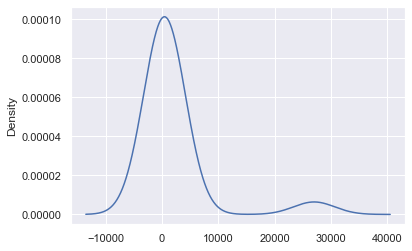

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

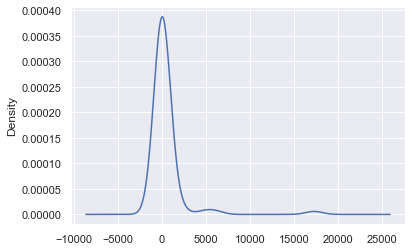

In [11]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\hallt\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df =application_df.drop(application_cat,1)
application_df.head()

C:\Users\hallt\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

y = application_df["IS_SUCCESSFUL"].values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_tests = train_test_split(X, y, random_state=78)

C:\Users\hallt\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,621
Trainable params: 7,621
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [22]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks =[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 8:20 - loss: 1142.6528 - accuracy: 0.4062
Epoch 1: saving model to checkpoints\weights.01.hdf5
  5/804 [..............................] - ETA: 15s - loss: 10962.2842 - accuracy: 0.4688
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 8s - loss: 6490.6748 - accuracy: 0.5021  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 6s - loss: 11328.9053 - accuracy: 0.5113
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 35/804 [>.............................] - ETA: 6s - loss: 9882.5508 - accuracy: 0.5009 
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 45/804 [>.............................] - ETA: 6s - loss: 

410/804 [==============>...............] - ETA: 2s - loss: 39332.5625 - accuracy: 0.4877
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 47448.5078 - accuracy: 0.4893
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 46478.6328 - accuracy: 0.4906
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 45624.7227 - accuracy: 0.4918
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 45009.9258 - accuracy: 0.4916
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
460/804 [===========

 16/804 [..............................] - ETA: 5s - loss: 6583.2056 - accuracy: 0.5020
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 26/804 [..............................] - ETA: 5s - loss: 6144.0029 - accuracy: 0.4724
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 36/804 [>.............................] - ETA: 5s - loss: 9958.3027 - accuracy: 0.4661
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 46/804 [>.............................] - ETA: 5s - loss: 12400.2471 - accuracy: 0.4667
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 56/804 [=>............................] - ETA: 4s - loss: 11264.9287 - accuracy: 0.4771
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 66/804 [=>............

436/804 [===============>..............] - ETA: 2s - loss: 16494.9922 - accuracy: 0.4935
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 16256.9170 - accuracy: 0.4929
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
456/804 [================>.............] - ETA: 2s - loss: 15960.2295 - accuracy: 0.4929
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
466/804 [================>.............] - ETA: 2s - loss: 15779.0293 - accuracy: 0.4922
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
476/804 [================>.............] - ETA: 1s - loss: 15520.2061 - accuracy: 0.4919
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
486/804 [===========


Epoch 3: saving model to checkpoints\weights.03.hdf5
 47/804 [>.............................] - ETA: 4s - loss: 1219.2635 - accuracy: 0.5346
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 1017.8732 - accuracy: 0.5351
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 895.6765 - accuracy: 0.5382 
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 794.1850 - accuracy: 0.5304
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 87/804 [==>...........................] - ETA: 3s - loss: 740.5170 - accuracy: 0.5298
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to c


Epoch 3: saving model to checkpoints\weights.03.hdf5
467/804 [================>.............] - ETA: 1s - loss: 23724.3691 - accuracy: 0.4933
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
477/804 [================>.............] - ETA: 1s - loss: 24577.6484 - accuracy: 0.4940
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
487/804 [=================>............] - ETA: 1s - loss: 24083.2148 - accuracy: 0.4935
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
497/804 [=================>............] - ETA: 1s - loss: 23612.5273 - accuracy: 0.4945
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
507/804 [=================>............] - ETA: 1s - loss: 23243.2559 - accuracy: 0.4946
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving mod

 68/804 [=>............................] - ETA: 4s - loss: 14939.4033 - accuracy: 0.5312
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 13466.0107 - accuracy: 0.5317
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 11979.7334 - accuracy: 0.5337
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 98/804 [==>...........................] - ETA: 3s - loss: 10774.1621 - accuracy: 0.5233
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 10070.1104 - accuracy: 0.5139
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
118/804 [===>.......

488/804 [=================>............] - ETA: 1s - loss: 13390.6787 - accuracy: 0.4886
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
498/804 [=================>............] - ETA: 1s - loss: 13122.0664 - accuracy: 0.4897
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
508/804 [=================>............] - ETA: 1s - loss: 12866.8750 - accuracy: 0.4911
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 12626.2246 - accuracy: 0.4920
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 12389.1885 - accuracy: 0.4931
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
538/804 [===========


Epoch 5: saving model to checkpoints\weights.05.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 3248.0186 - accuracy: 0.4605
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 8770.7148 - accuracy: 0.4567
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 8715.0107 - accuracy: 0.4645
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 8340.5713 - accuracy: 0.4671
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 10774.6406 - accuracy: 0.4692
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model t


Epoch 5: saving model to checkpoints\weights.05.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 26853.0840 - accuracy: 0.4884
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 26355.9980 - accuracy: 0.4889
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 25867.9102 - accuracy: 0.4905
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 25400.5449 - accuracy: 0.4905
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 24969.4219 - accuracy: 0.4908
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving mod

120/804 [===>..........................] - ETA: 3s - loss: 25759.2832 - accuracy: 0.5247
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 23893.5410 - accuracy: 0.5257
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 22588.0137 - accuracy: 0.5252
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 21320.1133 - accuracy: 0.5258
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 21424.7656 - accuracy: 0.5277
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
170/804 [=====>.....

540/804 [===================>..........] - ETA: 1s - loss: 12074.7236 - accuracy: 0.5008
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 11861.8525 - accuracy: 0.5015
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 12095.0986 - accuracy: 0.5010
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 11897.7607 - accuracy: 0.5012
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 11714.9688 - accuracy: 0.5023
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
590/804 [===========

151/804 [====>.........................] - ETA: 3s - loss: 13927.4385 - accuracy: 0.5236
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 13614.4785 - accuracy: 0.5235
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 13125.2852 - accuracy: 0.5245
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 12521.1064 - accuracy: 0.5245
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 11902.4189 - accuracy: 0.5268
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
201/804 [======>....


Epoch 7: saving model to checkpoints\weights.07.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 7908.9746 - accuracy: 0.5070
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 7787.3770 - accuracy: 0.5055
Epoch 7: saving model to checkpoints\weights.07.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 7764.3149 - accuracy: 0.5044
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 7697.9556 - accuracy: 0.5034
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 8607.2490 - accuracy: 0.5029
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
616/804 [================


Epoch 8: saving model to checkpoints\weights.08.hdf5
132/804 [===>..........................] - ETA: 5s - loss: 7735.0474 - accuracy: 0.4993
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 7273.9746 - accuracy: 0.4960
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
152/804 [====>.........................] - ETA: 5s - loss: 6835.6245 - accuracy: 0.4924
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
162/804 [=====>........................] - ETA: 5s - loss: 6968.6411 - accuracy: 0.4936
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
172/804 [=====>........................] - ETA: 5s - loss: 6622.5234 - accuracy: 0.4945
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to


Epoch 8: saving model to checkpoints\weights.08.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 11182.7803 - accuracy: 0.5014
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 11048.1768 - accuracy: 0.5006
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 10907.4043 - accuracy: 0.5001
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 10834.0908 - accuracy: 0.4998
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 11691.3623 - accuracy: 0.4994
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving mod

158/804 [====>.........................] - ETA: 3s - loss: 23973.4023 - accuracy: 0.4854
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 29760.1094 - accuracy: 0.4864
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 28240.5176 - accuracy: 0.4895
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 46079.0859 - accuracy: 0.4915
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 43847.4492 - accuracy: 0.4913
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
208/804 [======>....

578/804 [====================>.........] - ETA: 1s - loss: 27539.9961 - accuracy: 0.4823
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 27074.1641 - accuracy: 0.4821
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 26622.6074 - accuracy: 0.4837
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 26185.6777 - accuracy: 0.4854
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 25766.5801 - accuracy: 0.4868
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
628/804 [===========

179/804 [=====>........................] - ETA: 3s - loss: 15157.9033 - accuracy: 0.5407
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 18114.6855 - accuracy: 0.5389
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 17277.1777 - accuracy: 0.5374
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 20568.8398 - accuracy: 0.5354
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 19662.5078 - accuracy: 0.5337
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
229/804 [=

589/804 [====================>.........] - ETA: 1s - loss: 14765.7266 - accuracy: 0.5015
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 14526.6328 - accuracy: 0.5014
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 14288.9404 - accuracy: 0.5010
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 14058.6123 - accuracy: 0.5014
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 13835.7920 - accuracy: 0.5029
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
639/804 [=

190/804 [======>.......................] - ETA: 3s - loss: 12624.7998 - accuracy: 0.5059
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 12020.1162 - accuracy: 0.5064
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 11467.4736 - accuracy: 0.5092
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 11747.7920 - accuracy: 0.5095
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 11330.6924 - accuracy: 0.5091
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
240/804 [=


Epoch 11: saving model to checkpoints\weights.11.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 9132.6367 - accuracy: 0.5112
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 9125.3350 - accuracy: 0.5110
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 9015.8857 - accuracy: 0.5111
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 8967.3301 - accuracy: 0.5104
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 8918.8135 - accuracy: 0.5102
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: savi


Epoch 12: saving model to checkpoints\weights.12.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 342.1509 - accuracy: 0.5286
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 331.5816 - accuracy: 0.5287
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 328.4595 - accuracy: 0.5296
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
251/804 [========>.....................] - ETA: 3s - loss: 452.9373 - accuracy: 0.5280
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 1578.4576 - accuracy: 0.5265
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving m

631/804 [======================>.......] - ETA: 0s - loss: 2830.8491 - accuracy: 0.5270
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 2790.9897 - accuracy: 0.5280
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 2750.4172 - accuracy: 0.5280
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 2709.0481 - accuracy: 0.5275
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 2668.9873 - accuracy: 0.5281
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
681/804 [======

237/804 [=======>......................] - ETA: 3s - loss: 4995.5732 - accuracy: 0.5235
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 4808.7891 - accuracy: 0.5242
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 4870.7808 - accuracy: 0.5241
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 4705.0913 - accuracy: 0.5255
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 4543.8125 - accuracy: 0.5274
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
287/804 [======


Epoch 13: saving model to checkpoints\weights.13.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 6502.9155 - accuracy: 0.5134
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 6412.4634 - accuracy: 0.5132
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 6494.4741 - accuracy: 0.5122
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 6440.3799 - accuracy: 0.5119
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 6394.2891 - accuracy: 0.5114
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: savi

258/804 [========>.....................] - ETA: 3s - loss: 1536.1578 - accuracy: 0.5134
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 1484.7594 - accuracy: 0.5161
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 1530.2244 - accuracy: 0.5174
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 1753.3308 - accuracy: 0.5183
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 1712.4952 - accuracy: 0.5199
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
308/804 [======


Epoch 14: saving model to checkpoints\weights.14.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 4954.2573 - accuracy: 0.5142
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 4882.3804 - accuracy: 0.5145
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 4812.5171 - accuracy: 0.5150
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 4744.8354 - accuracy: 0.5158
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 4679.3774 - accuracy: 0.5155
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: savi

279/804 [=========>....................] - ETA: 2s - loss: 535.9280 - accuracy: 0.5058
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
289/804 [=========>....................] - ETA: 2s - loss: 527.7035 - accuracy: 0.5054
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 550.2668 - accuracy: 0.5046
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 536.5092 - accuracy: 0.5038
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 593.9753 - accuracy: 0.5026
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
329/804 [===========

699/804 [=========================>....] - ETA: 0s - loss: 1000.9675 - accuracy: 0.5110
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 1012.0071 - accuracy: 0.5110
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 1020.1223 - accuracy: 0.5110
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 1662.4325 - accuracy: 0.5117
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 1659.4487 - accuracy: 0.5118
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
749/804 [======

310/804 [==========>...................] - ETA: 2s - loss: 0.6973 - accuracy: 0.5305
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.6968 - accuracy: 0.5309
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.6965 - accuracy: 0.5304
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6964 - accuracy: 0.5286
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.6953 - accuracy: 0.5311
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
360/804 [============>........

730/804 [==========================>...] - ETA: 0s - loss: 0.6859 - accuracy: 0.5315
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6858 - accuracy: 0.5312
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6857 - accuracy: 0.5310
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6855 - accuracy: 0.5312
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6854 - accuracy: 0.5316
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
780/804 [=====================

341/804 [===========>..................] - ETA: 2s - loss: 0.6726 - accuracy: 0.5356
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.6727 - accuracy: 0.5353
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.6726 - accuracy: 0.5354
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.6725 - accuracy: 0.5353
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6723 - accuracy: 0.5362
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
391/804 [=============>.......

761/804 [===========================>..] - ETA: 0s - loss: 0.6701 - accuracy: 0.5352
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6701 - accuracy: 0.5364
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6700 - accuracy: 0.5367
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6698 - accuracy: 0.5369
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6698 - accuracy: 0.5369
Epoch 18/100
  1/804 [..............................] - ETA: 3s - loss: 0.6350 - accuracy: 0.5938
Epoch 18: saving model to checkpoints


Epoch 18: saving model to checkpoints\weights.18.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.6620 - accuracy: 0.6025
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.6618 - accuracy: 0.6052
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.6615 - accuracy: 0.6069
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6614 - accuracy: 0.6080
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6614 - accuracy: 0.6078
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to che

797/804 [============================>.] - ETA: 0s - loss: 0.6597 - accuracy: 0.6270
Epoch 18: saving model to checkpoints\weights.18.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6595 - accuracy: 0.6277
Epoch 19/100
  1/804 [..............................] - ETA: 3s - loss: 0.6546 - accuracy: 0.7188
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6564 - accuracy: 0.6500
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.6499 - accuracy: 0.6806
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6514 - accuracy: 0.6752
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints

408/804 [==============>...............] - ETA: 2s - loss: 0.6520 - accuracy: 0.6488
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6519 - accuracy: 0.6480
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6519 - accuracy: 0.6468
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6518 - accuracy: 0.6473
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.6518 - accuracy: 0.6469
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
458/804 [================>....

 19/804 [..............................] - ETA: 4s - loss: 0.6555 - accuracy: 0.6513
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 0.6564 - accuracy: 0.6422
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.6528 - accuracy: 0.6474
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6506 - accuracy: 0.6537
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6485 - accuracy: 0.6573
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
 69/804 [=>...................

439/804 [===============>..............] - ETA: 1s - loss: 0.6466 - accuracy: 0.6395
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6464 - accuracy: 0.6399
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.6459 - accuracy: 0.6409
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6461 - accuracy: 0.6406
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6463 - accuracy: 0.6403
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
489/804 [=================>...

 49/804 [>.............................] - ETA: 4s - loss: 0.6440 - accuracy: 0.6480
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 55/804 [=>............................] - ETA: 4s - loss: 0.6457 - accuracy: 0.6398
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 65/804 [=>............................] - ETA: 4s - loss: 0.6448 - accuracy: 0.6442
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 75/804 [=>............................] - ETA: 4s - loss: 0.6445 - accuracy: 0.6471
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 85/804 [==>...........................] - ETA: 4s - loss: 0.6425 - accuracy: 0.6504
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 95/804 [==>..................

465/804 [================>.............] - ETA: 1s - loss: 0.6440 - accuracy: 0.6503
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.6440 - accuracy: 0.6508
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6437 - accuracy: 0.6509
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6435 - accuracy: 0.6516
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6436 - accuracy: 0.6516
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
515/804 [==================>..


Epoch 22: saving model to checkpoints\weights.22.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.6467 - accuracy: 0.6439
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.6451 - accuracy: 0.6477
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.6465 - accuracy: 0.6423
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.6466 - accuracy: 0.6391
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6465 - accuracy: 0.6387
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to che

496/804 [=================>............] - ETA: 1s - loss: 0.6388 - accuracy: 0.6542
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6389 - accuracy: 0.6545
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6388 - accuracy: 0.6545
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6389 - accuracy: 0.6543
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6389 - accuracy: 0.6540
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
546/804 [===================>.

102/804 [==>...........................] - ETA: 4s - loss: 0.6420 - accuracy: 0.6483
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
112/804 [===>..........................] - ETA: 4s - loss: 0.6404 - accuracy: 0.6509
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
122/804 [===>..........................] - ETA: 4s - loss: 0.6385 - accuracy: 0.6547
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.6379 - accuracy: 0.6551
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 0.6385 - accuracy: 0.6529
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
152/804 [====>................

522/804 [==================>...........] - ETA: 1s - loss: 0.6373 - accuracy: 0.6525
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6375 - accuracy: 0.6521
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6377 - accuracy: 0.6515
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.6377 - accuracy: 0.6515
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6378 - accuracy: 0.6515
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
572/804 [====================>

128/804 [===>..........................] - ETA: 3s - loss: 0.6393 - accuracy: 0.6565
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.6383 - accuracy: 0.6572
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.6389 - accuracy: 0.6546
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.6385 - accuracy: 0.6535
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.6380 - accuracy: 0.6538
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
178/804 [=====>...............

548/804 [===================>..........] - ETA: 1s - loss: 0.6353 - accuracy: 0.6553
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.6354 - accuracy: 0.6552
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6352 - accuracy: 0.6553
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6355 - accuracy: 0.6546
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6354 - accuracy: 0.6547
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
598/804 [=====================

159/804 [====>.........................] - ETA: 3s - loss: 0.6364 - accuracy: 0.6456
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.6374 - accuracy: 0.6437
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.6370 - accuracy: 0.6454
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6365 - accuracy: 0.6462
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6357 - accuracy: 0.6476
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
209/804 [======>..............

579/804 [====================>.........] - ETA: 1s - loss: 0.6354 - accuracy: 0.6516
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6352 - accuracy: 0.6519
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6351 - accuracy: 0.6519
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6348 - accuracy: 0.6520
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6347 - accuracy: 0.6521
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
629/804 [=====================

190/804 [======>.......................] - ETA: 3s - loss: 0.6289 - accuracy: 0.6625
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.6296 - accuracy: 0.6616
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.6299 - accuracy: 0.6610
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6302 - accuracy: 0.6595
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6315 - accuracy: 0.6569
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
240/804 [=======>.............

610/804 [=====================>........] - ETA: 1s - loss: 0.6278 - accuracy: 0.6643
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6280 - accuracy: 0.6643
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6280 - accuracy: 0.6642
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6280 - accuracy: 0.6643
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6279 - accuracy: 0.6647
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
660/804 [=====================

221/804 [=======>......................] - ETA: 3s - loss: 0.6256 - accuracy: 0.6697
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.6249 - accuracy: 0.6726
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.6252 - accuracy: 0.6722
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.6245 - accuracy: 0.6733
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.6240 - accuracy: 0.6731
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
271/804 [=========>...........

641/804 [======================>.......] - ETA: 0s - loss: 0.6246 - accuracy: 0.6707
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6244 - accuracy: 0.6708
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6249 - accuracy: 0.6701
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6251 - accuracy: 0.6700
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6251 - accuracy: 0.6702
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
691/804 [=====================


Epoch 28: saving model to checkpoints\weights.28.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6227 - accuracy: 0.6696
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.6227 - accuracy: 0.6691
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.6240 - accuracy: 0.6680
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.6245 - accuracy: 0.6680
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.6251 - accuracy: 0.6675
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to che

677/804 [========================>.....] - ETA: 0s - loss: 0.6236 - accuracy: 0.6752
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6238 - accuracy: 0.6748
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6238 - accuracy: 0.6746
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6235 - accuracy: 0.6750
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6232 - accuracy: 0.6755
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
727/804 [=====================

283/804 [=========>....................] - ETA: 2s - loss: 0.6249 - accuracy: 0.6738
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.6237 - accuracy: 0.6748
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.6232 - accuracy: 0.6753
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6232 - accuracy: 0.6752
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.6233 - accuracy: 0.6745
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
333/804 [===========>.........

703/804 [=========================>....] - ETA: 0s - loss: 0.6264 - accuracy: 0.6747
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6263 - accuracy: 0.6751
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6261 - accuracy: 0.6752
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6259 - accuracy: 0.6751
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6258 - accuracy: 0.6751
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
753/804 [=====================


Epoch 30: saving model to checkpoints\weights.30.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6209 - accuracy: 0.6795
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6205 - accuracy: 0.6807
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6201 - accuracy: 0.6812
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6199 - accuracy: 0.6822
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6195 - accuracy: 0.6831
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to che

739/804 [==========================>...] - ETA: 0s - loss: 0.6220 - accuracy: 0.6804
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6224 - accuracy: 0.6794
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6223 - accuracy: 0.6793
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6225 - accuracy: 0.6787
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6226 - accuracy: 0.6786
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
789/804 [=====================

350/804 [============>.................] - ETA: 2s - loss: 0.6203 - accuracy: 0.6835
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6207 - accuracy: 0.6834
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6202 - accuracy: 0.6845
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6197 - accuracy: 0.6855
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6202 - accuracy: 0.6845
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
400/804 [=============>.......


Epoch 31: saving model to checkpoints\weights.31.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6222 - accuracy: 0.6804
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6221 - accuracy: 0.6805
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6223 - accuracy: 0.6803
Epoch 31: saving model to checkpoints\weights.31.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6223 - accuracy: 0.6804
Epoch 32/100

Epoch 32: saving model to checkpoints\weights.32.hdf5
  1/804 [..............................] - ETA: 15s - loss: 0.4678 - accuracy: 0.8438
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6199 

381/804 [=============>................] - ETA: 2s - loss: 0.7005 - accuracy: 0.5131
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.7003 - accuracy: 0.5131
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.7001 - accuracy: 0.5135
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.6999 - accuracy: 0.5140
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.6997 - accuracy: 0.5143
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
431/804 [===============>.....

804/804 [==============================] - 4s 5ms/step - loss: 0.6956 - accuracy: 0.5223
Epoch 33/100
  1/804 [..............................] - ETA: 3s - loss: 0.7017 - accuracy: 0.4375
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5382
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5349
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5405
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5321
Epoch 33: saving model to checkpoints


Epoch 33: saving model to checkpoints\weights.33.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5280
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5277
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5285
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5291
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to che


Epoch 34: saving model to checkpoints\weights.34.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5268
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5329
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5384
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5383
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5409
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to che

448/804 [===============>..............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5364
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5356
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5347
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
498/804 [=================>...

 59/804 [=>............................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5228
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5226
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5131
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5183
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5218
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
109/804 [===>.................

479/804 [================>.............] - ETA: 1s - loss: 0.6721 - accuracy: 0.5672
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6707 - accuracy: 0.5699
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6697 - accuracy: 0.5722
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6687 - accuracy: 0.5747
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6674 - accuracy: 0.5770
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
529/804 [==================>..

 90/804 [==>...........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5309
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5316
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5315
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5279
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5286
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
140/804 [====>................

510/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5297
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5297
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5300
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5300
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
560/804 [===================>.

121/804 [===>..........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5325
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5344
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5335
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
171/804 [=====>...............

541/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
591/804 [=====================

147/804 [====>.........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5274
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5271
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5286
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
177/804 [=====>........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5277
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5277
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
197/804 [======>..............


Epoch 38: saving model to checkpoints\weights.38.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5263
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5264
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5262
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5279
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to che

178/804 [=====>........................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5191
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5181
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5204
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5200
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
218/804 [=======>......................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5199
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
228/804 [=======>.............

598/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5302
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5302
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5301
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
648/804 [=====================

209/804 [======>.......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5315
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5295
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5306
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5306
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
249/804 [========>.....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5291
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
259/804 [========>............


Epoch 40: saving model to checkpoints\weights.40.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5281
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5284
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5288
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5294
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to che

240/804 [=======>......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5352
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5319
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
290/804 [=========>...........


Epoch 41: saving model to checkpoints\weights.41.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to che

241/804 [=======>......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5323
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5319
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
261/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5323
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5334
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5360
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
291/804 [=========>...........

661/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
711/804 [=====================


Epoch 43: saving model to checkpoints\weights.43.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5263
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5277
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5282
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5289
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5281
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to che

697/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
747/804 [=====================

303/804 [==========>...................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5369
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5377
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
353/804 [============>........

723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
773/804 [=====================


Epoch 45: saving model to checkpoints\weights.45.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5309
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5303
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5312
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5308
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5309
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to che

754/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
804/804 [=====================


Epoch 46: saving model to checkpoints\weights.46.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5287
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5284
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5290
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to che

790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 47/100

Epoch 47: saving model to checkpoints\weights.47.hdf5
  1/804 [..............................] - ETA: 15s - loss: 0.6809 - accuracy: 0.6250
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5455 
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5476
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.6896

401/804 [=============>................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5362
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5367
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5367
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5376
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5364
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
451/804 [===============>.....


Epoch 48: saving model to checkpoints\weights.48.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6945 - accuracy: 0.5018
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6932 - accuracy: 0.5139
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.6929 - accuracy: 0.5169
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5226
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5263
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to che

437/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
487/804 [=================>...

 48/804 [>.............................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5221
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5318
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5331
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5361
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5330
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 98/804 [==>..................

468/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5344
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
518/804 [==================>..

 79/804 [=>............................] - ETA: 4s - loss: 0.6931 - accuracy: 0.5162
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5197
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5193
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
109/804 [===>..........................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5209
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
119/804 [===>..........................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5236
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
129/804 [===>.................

499/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
549/804 [===================>.

110/804 [===>..........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5290
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5263
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5243
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5241
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5252
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
160/804 [====>................

530/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5303
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5307
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
580/804 [====================>

141/804 [====>.........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5324
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5326
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5302
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5295
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
191/804 [======>..............

561/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5336
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
611/804 [=====================

168/804 [=====>........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5262
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
177/804 [=====>........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5272
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5271
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
197/804 [======>.......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5284
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5264
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
217/804 [=======>.............

587/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5315
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
637/804 [=====================

198/804 [======>.......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5374
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5397
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
218/804 [=======>......................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5409
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
228/804 [=======>......................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5428
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
238/804 [=======>......................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5427
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
248/804 [========>............

618/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5316
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5310
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
668/804 [=====================

224/804 [=======>......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5301
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
234/804 [=======>......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5308
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
244/804 [========>.....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5312
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5324
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5320
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
274/804 [=========>...........

644/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5306
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
694/804 [=====================


Epoch 56: saving model to checkpoints\weights.56.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5232
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
270/804 [=========>....................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5240
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5237
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5248
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5236
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to che

675/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5303
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5305
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
725/804 [=====================

286/804 [=========>....................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5220
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5229
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5241
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5251
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5248
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
336/804 [===========>.........

706/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
756/804 [=====================

317/804 [==========>...................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5280
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5280
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5280
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5269
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5269
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
367/804 [============>........


Epoch 58: saving model to checkpoints\weights.58.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to che


Epoch 59: saving model to checkpoints\weights.59.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5323
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5323
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
373/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5321
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
383/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
393/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5320
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to che

773/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5328
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5328
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6915 - accuracy: 0.5321
Epoch 60/100
  1/804 [..............................] - ETA: 3s - loss: 0.6829 - accuracy: 0.5938
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5174
Epoch 60: saving model to checkpoints

384/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5339
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5341
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5338
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5343
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5341
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
434/804 [===============>.....

Epoch 61/100
  1/804 [..............................] - ETA: 2s - loss: 0.6855 - accuracy: 0.5625
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6938 - accuracy: 0.5250
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.7011 - accuracy: 0.4891
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.6979 - accuracy: 0.5030
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.6969 - accuracy: 0.5037
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 50/804 [>.......

424/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5332
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5335
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5324
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5327
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
471/804 [================>....

 31/804 [>.............................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5202
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.6931 - accuracy: 0.5168
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.6929 - accuracy: 0.5184
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5225
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5220
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 81/804 [==>..................

441/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
491/804 [=================>...


Epoch 63: saving model to checkpoints\weights.63.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5329
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5378
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5365
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5352
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5316
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to che

477/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5299
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5302
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5295
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5288
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
527/804 [==================>..


Epoch 64: saving model to checkpoints\weights.64.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5309
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5300
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5292
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5305
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5317
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to che

508/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5333
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5328
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5326
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
558/804 [===================>.

114/804 [===>..........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5255
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
124/804 [===>..........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5247
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
134/804 [====>.........................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5219
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
144/804 [====>.........................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5215
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
154/804 [====>.........................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5191
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
164/804 [=====>...............


Epoch 65: saving model to checkpoints\weights.65.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5302
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5303
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5306
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to che


Epoch 66: saving model to checkpoints\weights.66.hdf5
150/804 [====>.........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5302
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
160/804 [====>.........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5301
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
170/804 [=====>........................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5322
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
180/804 [=====>........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5302
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5309
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to che

560/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
610/804 [=====================

166/804 [=====>........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5405
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
176/804 [=====>........................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5421
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
186/804 [=====>........................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5442
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
196/804 [======>.......................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5440
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
206/804 [======>.......................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5417
Epoch 67: saving model to checkpoints\weights.67.hdf5
214/804 [======>.......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5410



Epoch 67: saving model to checkpoints\weights.67.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to che

197/804 [======>.......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5320
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5302
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5292
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5266
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5262
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
247/804 [========>............

617/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5307
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5300
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5301
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
667/804 [=====================

223/804 [=======>......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5355
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
233/804 [=======>......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5369
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5364
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5351
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5345
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
273/804 [=========>...........

643/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5316
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
693/804 [=====================


Epoch 70: saving model to checkpoints\weights.70.hdf5
259/804 [========>.....................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5381
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
269/804 [=========>....................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5390
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5398
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
289/804 [=========>....................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5394
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5412
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to che

674/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
724/804 [=====================

285/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
305/804 [==========>...................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5313
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
335/804 [===========>.........


Epoch 71: saving model to checkpoints\weights.71.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5323
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5323
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to che

321/804 [==========>...................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5308
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5310
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5329
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
371/804 [============>........


Epoch 72: saving model to checkpoints\weights.72.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5329
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5328
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5331
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5329
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to che


Epoch 73: saving model to checkpoints\weights.73.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5362
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5358
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5359
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5357
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5362
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to che

777/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 73: saving model to checkpoints\weights.73.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 74/100
  1/804 [..............................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5625
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6934 - accuracy: 0.5039
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints

388/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5328
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5321
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
438/804 [===============>.....

  1/804 [..............................] - ETA: 3s - loss: 0.6865 - accuracy: 0.5625
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6941 - accuracy: 0.5139
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.6891 - accuracy: 0.5461
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5409
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.6880 - accuracy: 0.5521
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 49/804 [>....................

419/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
469/804 [================>....

 30/804 [>.............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5302
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5320
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5450
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5411
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5402
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 80/804 [=>...................

450/804 [===============>..............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5374
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5372
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5359
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
500/804 [=================>...

 61/804 [=>............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5389
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5361
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5328
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5268
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5291
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
111/804 [===>.................

481/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5296
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5283
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5281
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5277
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
531/804 [==================>..

 87/804 [==>...........................] - ETA: 4s - loss: 0.6889 - accuracy: 0.5474
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5445
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5464
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
117/804 [===>..........................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5462
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5423
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
137/804 [====>................


Epoch 78: saving model to checkpoints\weights.78.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5372
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5367
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5367
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5362
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5362
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to che

118/804 [===>..........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5339
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5359
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5342
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5346
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5334
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
168/804 [=====>...............


Epoch 79: saving model to checkpoints\weights.79.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5340
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5335
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5336
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5326
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to che

149/804 [====>.........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5317
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5320
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5335
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5342
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5317
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
199/804 [======>..............

569/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5311
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5314
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5310
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5315
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5319
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
619/804 [=====================

180/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5339
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5327
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5316
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5311
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5330
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
230/804 [=======>.............


Epoch 81: saving model to checkpoints\weights.81.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5305
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5315
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5315
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to che

211/804 [======>.......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5302
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5300
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5302
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5311
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
251/804 [========>.....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5306
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
261/804 [========>............


Epoch 82: saving model to checkpoints\weights.82.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5320
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to che


Epoch 83: saving model to checkpoints\weights.83.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5284
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to che

667/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5305
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5306
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
717/804 [=====================

278/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5311
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5328
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5316
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
328/804 [===========>.........

698/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
748/804 [=====================

309/804 [==========>...................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5345
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5341
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5331
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5338
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
359/804 [============>........

729/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
779/804 [=====================

335/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5309
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5327
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5327
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
385/804 [=============>.......


Epoch 86: saving model to checkpoints\weights.86.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 87/100

Epoch 87: saving model to checkpoints\weights.87.hdf5
  1/804 [...

371/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5329
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5328
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5332
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5342
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5344
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
421/804 [==============>......


Epoch 87: saving model to checkpoints\weights.87.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5320
Epoch 87: saving model to checkpoints\weights.87.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 88/100
  1/804 [..............................] - ETA: 2s - loss: 0.6994 - accuracy: 0.4688
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6849 - accuracy: 0.5759
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6878 - accuracy: 0.5570
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.6876 - accuracy: 0.5567
Epoch 88: saving model to checkpoints


Epoch 88: saving model to checkpoints\weights.88.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5382
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5380
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5375
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6903 - accuracy: 0.5388
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5383
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to che


Epoch 89: saving model to checkpoints\weights.89.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6929 - accuracy: 0.5191
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5357
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5304
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5299
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5356
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to che

438/804 [===============>..............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5296
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5298
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5300
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5302
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5308
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
488/804 [=================>...

 49/804 [>.............................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5427
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5387
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5344
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5376
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5348
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 99/804 [==>..................

469/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5295
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5292
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5296
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5297
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5296
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
519/804 [==================>..

 80/804 [=>............................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5301
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5281
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
100/804 [==>...........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5303
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
110/804 [===>..........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5364
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
120/804 [===>..........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5339
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
130/804 [===>.................

500/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5320
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5330
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5328
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
550/804 [===================>.

111/804 [===>..........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5363
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5362
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5394
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5410
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5362
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
161/804 [=====>...............


Epoch 92: saving model to checkpoints\weights.92.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to che

142/804 [====>.........................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5324
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
152/804 [====>.........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5337
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5336
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5336
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5338
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
192/804 [======>..............

562/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5361
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5361
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5359
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5363
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5363
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
612/804 [=====================

168/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5359
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5381
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5356
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5352
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5349
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
218/804 [=======>.............


Epoch 94: saving model to checkpoints\weights.94.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5330
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5339
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5339
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to che

199/804 [======>.......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5280
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5268
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5253
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5248
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5243
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
249/804 [========>............


Epoch 95: saving model to checkpoints\weights.95.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5301
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5298
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5301
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5306
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to che

230/804 [=======>......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5378
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5362
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5362
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5353
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
270/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5332
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
280/804 [=========>...........

650/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
700/804 [=====================

261/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5339
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5336
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5317
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5328
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5321
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
311/804 [==========>..........

681/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
731/804 [=====================


Epoch 98: saving model to checkpoints\weights.98.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5281
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5284
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5292
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5287
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5295
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to che

717/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5320
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5320
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
767/804 [=====================

328/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5331
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5338
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5338
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
378/804 [=============>.......

748/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 99: saving model to checkpoints\weights.99.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325


349/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5338
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
399/804 [=

759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 100: saving model to checkpoints\weights.100.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.69

<AxesSubplot:>

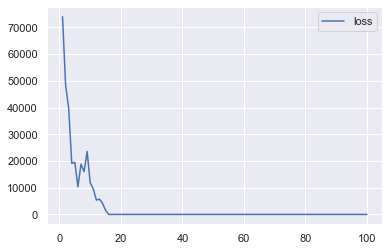

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

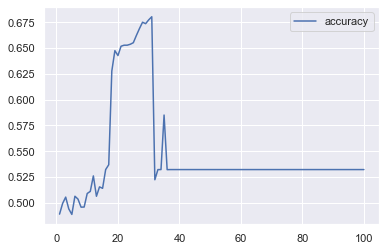

In [27]:
# Plot the Accuracy
history_df.plot(y="accuracy")

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_tests,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.7492 - accuracy: 0.5761 - 611ms/epoch - 2ms/step
Loss: 0.7492473125457764, Accuracy: 0.576093316078186


In [30]:
# Export our model to HDF5 file
nn.save("./trained_models/AlphabetSoupCharity.h5")